# Sprawozdanie z drugiej listy zadań na laboratorium z Technologii Sieciowych
*Paweł Rubin*

## 1. Wstęp

### 1.1 Treści zadań

1. Rozważmy model sieci, w którym czas działania podzielony jest na interwały. Niech S = < G, H > będzie modelem sieci takim, że zbiór V grafu G = < V, E > zawiera 20 wierzchołków oznaczonych przez v(i), dla i = 1,..20; a zbiór E zawiera 19 krawędzi e(j,j+1), dla j = 1, ...,19, (przy czym zapis e(j,k) oznacza krawędź łączącą wierzchołki v(i) i v(k) ). Zbiór H zawiera funkcję niezawodości 'h' przyporządkowującą każdej krawędzi e(j,k) ze zbioru E wartość 0.95 oznacząjącą prawdopodobieństwo nieuszkodzenia (nierozerwania) tego kanału komunikacyjnego w dowolnym przedziale czasowym. (Zakładamy, że wierzchołki nie ulegaja uszkodzeniom).

    - Napisz program szacujący niezawodność (rozumianą jako prawdopodobieństwo nierozspójnienia) takiej sieci w dowolnym interwale.
    - Jak zmieni się niezawodność tej sieci po dodaniu krawędzi e(1,20) takiej, że h(e(1,20))=0.95
    - A jak zmieni się niezawodność tej sieci gdy dodatkowo dodamy jeszcze krawędzie e(1,10) oraz e(5,15) takie, że: h(e(1,10))=0.8, a h(e(5,15))=0.7.
    - A jak zmieni się niezawodność tej sieci gdy dodatkowo dodamy jeszcze 4 krawedzie pomiedzy losowymi wierzchołkami o h=0.4.
    
  Uwaga! Do szacowania niezawodności (spójności) najlepiej posłużyć się metodą Monte Carlo.
    
2. Rozważmy model sieci S = < G, H >. Przez N=[n(i,j)] będziemy oznaczać macierz natężeń strumienia pakietów, gdzie element n(i,j) jest liczbą pakietów przesyłanych (wprowadzanych do sieci) w ciągu sekundy od źródła v(i) do ujścia v(j).
    - Zaproponuj topologię grafu G ale tak aby żaden wierzchołek nie był izolowany oraz aby: |V|=10, |E|<20. Zaproponuj N oraz następujące funkcje krawędzi ze zbioru H: funkcję przepustowości 'c' (rozumianą jako maksymalną liczbę bitów, którą można wprowadzić do kanału komunikacyjnego w ciągu sekundy), oraz funkcję przepływu 'a' (rozumianą jako faktyczną liczbę pakietów, które wprowadza się do kanału komunikacyjego w ciągu sekundy). Pamiętaj aby funkcja przeplywu realizowała macierz N oraz aby dla każdego kanału 'e' zachodziło: c(e) > a(e).
    - Napisz program, w którym propozycje będzie można testować, tzn. który dla wybranych reprezentacji zadanych odpowiednimi macierzami, będzie obliczał średnie opóźnienie pakietu 'T' dane wzorem: T = 1/G * SUM_e( a(e)/(c(e)/m - a(e)) ), gdzie SUM_e oznacza sumowanie po wszystkich krawędziach 'e' ze zbioru E, 'G' jest sumą wszystkich elementów macierzy natężeń, a 'm' jest średnią wielkością pakietu w bitach.
    - Niech miarą niezawodności sieci jest prawdopodobieństwo tego, że w dowolnym przedziale czasowym, nierozspójniona sieć zachowuje T < T_max. Napisz program szacujący niezawodność takiej sieci przyjmując, że prawdopodobieństwo nieuszkodzenia każdej krawędzi w dowolnym interwale jest równe 'p'. Uwaga: 'N', 'p', 'T_max' oraz topologia wyjsciowa sieci są parametrami. Napisz sprawozdanie!

## 2. Rozwiązania

### 2.1 Zadanie pierwsze

#### 2.1.1 Model grafu
Stwórzmy model sieci podany w zadaniu. Niech $ S = <G, H> $ takie, że $ G = (V, E) $ gdzie $ |V| = 20 $ i $ |E| = 19 $ i $ H = \{h\}: \forall{v}:h(v) = 0.95 $

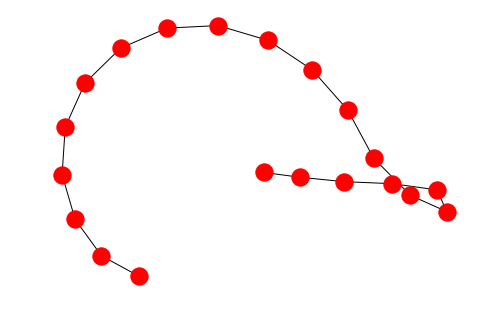

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
for i in range (1, 20):
    G.add_node(i)
    G.add_edge(i, i+1, p=0.95)
nx.draw(G)

#### 2.1.2 Szacowanie niezawodności motodą Monte Carlo

Zasymulujmy działanie sieci 10000 razy. Dokładna niezawodność: $ {0.95}^{19} \approx 0.3773$.

In [3]:
import random as rand
def approx(G):
    counter = 0
    for i in range(10000):
        Gprim = nx.Graph(G)
        for e in G.edges:
            if (rand.random() > G.get_edge_data(*e).get("p")):
                Gprim.remove_edge(*e)
        if (nx.is_connected(Gprim)):
            counter = counter + 1
    print(counter/10000)

approx(G)

0.3776


Sprawdźmy jak zmieni się niezawodność tej sieci po dodaniu krawędzi $ x = e(1, 20) $ takiej, że $ h(x) = 0.95 $.

0.7294


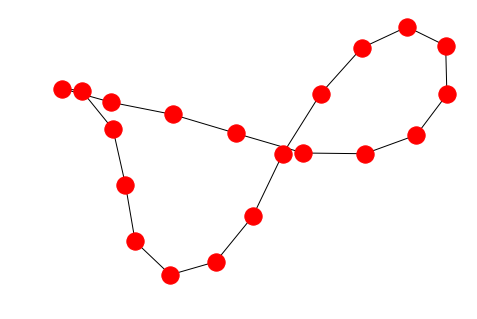

In [4]:
G1 = nx.Graph(G)
G1.add_edge(1, 20, p=0.95)
nx.draw(G1)
approx(G1)

Niezawodność sieci wzrośnie, zgodnie z intuicją. W tym przypadku potrzeba usunąc dwie krawędzie aby graf przestał być spójny.
Dokładnie: ${0.95}^{20} + {0.95}^{19} \approx 0.7358 $.


Sprawdźmy teraz jak zmieni się niezawodność tej sieci gdy dodatkowo dodamy jeszcze krawędzie $y=e(1,10)$ oraz $z=e(5,15)$ takie, że $h(y)=0.8$, a $h(z)=0.7$.

0.868


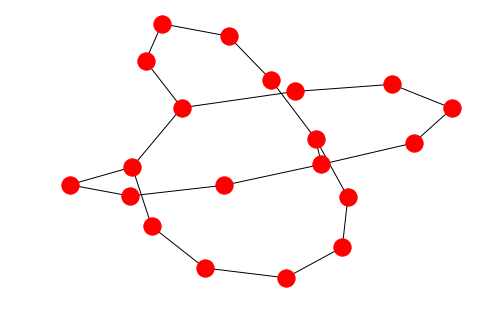

In [5]:
G2 = nx.Graph(G1)
G2.add_edge(1, 10, p=0.8)
G2.add_edge(5, 15, p=0.7)
nx.draw(G2)
approx(G2)

Zgodnie z intuicją, dodanie kolejnych połączeń zwiększa niezawodność sieci - rośnie średnia liczba krawędzi, które trzeba usunąć by graf przestał być spójny.

Dodajmy jeszcze 4 krawędzie pomiędzy losowymi wierzchołkami o $h(e_i)=0.4$

0.9049


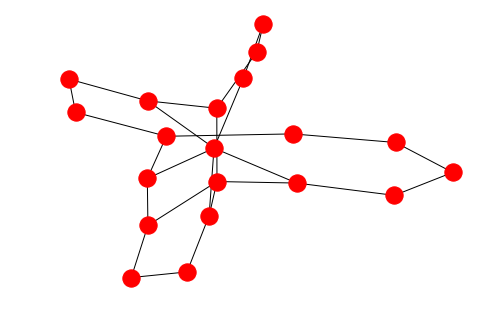

In [6]:
G3 = nx.Graph(G2)
for i in range(4):
    G3.add_edge(rand.randint(1, 20), rand.randint(1, 20), p=0.4)
nx.draw(G3)
approx(G3)

Znów kolejne połączenia zwiększyły szacowaną niezawodność.

### 2.2 Zadanie drugie

Rozważmy model sieci $ S = <G, H> $. Niech $ N = [n(i, j)]$ oznacza macierz natężeń strumienia pakietów, gdzie element $n(i, j)$ jest liczbą pakietów przesyłanych (wprowadzanych do sieci) w ciągu sekundy od źródła $v(i)$ do ujścia $v(j)$.

#### 2.2.1 Topologia modelu
Nasz model musi posiadać następujące właściwości:
- Żaden wierzchołek nie może być izolowany.
- $|V|=10$, $|E|<20$.
- Funkcje krawędzi ze zbioru H:
    - Funkcję przepustowości $c$ (maksymalna liczba bitów, którą można wprowadzić do kanału komunikacyjnego w ciągu sekundy).
    - Funkcję przepływu $a$ (faktyczna liczba pakietów, które wprowadza się do kanału komunikacyjego w ciągu sekundy), która realizuje macierz N.
    - $c(e)>a(e)$  
- Macierz N powinna posiadać poniższe własności:
    - Losowa lub arbitralnie ustalona, ale nie skrajnie rzadka.

##### Kilka prostych topologii
- Graf cykliczny.

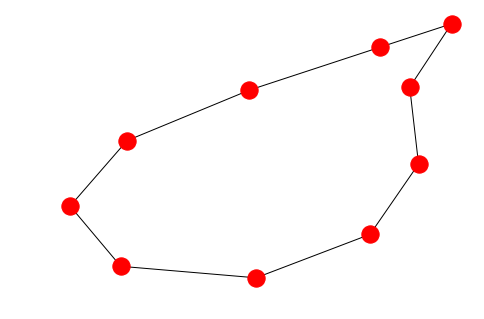

In [7]:
C = nx.cycle_graph(10)
nx.set_edge_attributes(C, 0.95, 'p')
nx.set_edge_attributes(C, 0, 'a')
nx.set_edge_attributes(C, 1024, 'c')
nx.draw(C)

- Graf cykliczny z dodatkowymi krawędziami

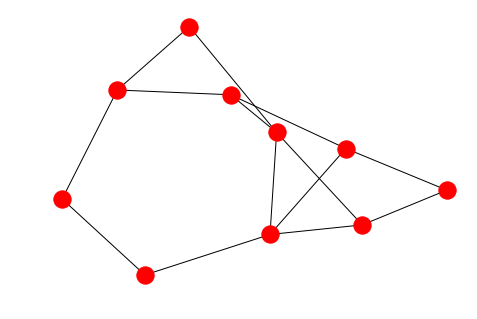

In [16]:
C1 = nx.Graph(C)
for i in range(5):
    C1.add_edge(rand.randint(1, 10), rand.randint(1, 10), p=0.95, c=1024, a=0)
nx.draw(C1)

##### Graf Petersena

Niech $G$ będzie grafem Petersena, oznaczmy go przez $P$. Graf $P$ posiada 10 wierzchołków i 15 krawędzi, więc spełnia wymagania. $P$ jest najmniejszym żmirłaczem, czyli spójnym grafem kubicznym bez mostów i o indeksie chromatycznym równym 4.
Własności grafu Petersena:
- Silnie regularny stopnia 3 (wszystkie wierchołki są stopnia 3).
- Trójspójny (usunięcie dowolnych dwóch wierzchołkow nie spowoduje rozspojenia).
- Graf Hamiltonowski (ma scieżkę Hamiltona - ścieżkę przebiegającą przez wszystkie wierzchołki dokladnie raz)
- Najmniejszy graf regularny stopnia 3 bez mostów i cykli Hamiltona (analogiczie do ścieżki ów Pana).

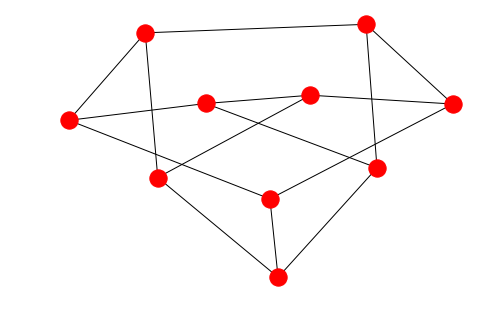

In [8]:
P = nx.petersen_graph()
nx.draw(P)

Zbadajmy niezawodność grafu Petersena analogicznie do zadania pierwszego.


In [9]:
nx.set_edge_attributes(P, 0.95, 'p')
approx(P)

0.9988


Graf Petersena, jako graf regularny, cechuja wysoka niezawodność.

Niech macierz N będzie zdefiniowana następująco.

In [10]:
import numpy as np
SIZE = P.number_of_nodes()
N = np.zeros((SIZE, SIZE))
for i in range(SIZE):
    for j in range(SIZE):
        if i != j:
            N[i][j] = rand.randint(0, 99)
print(N)

[[ 0. 32. 92.  3. 54. 71. 23. 30. 45. 56.]
 [70.  0. 46.  1. 93. 88. 81. 69. 41. 65.]
 [47. 42.  0. 45. 61. 56. 69. 31. 75. 66.]
 [87. 61. 40.  0. 73. 19. 20. 81. 90. 96.]
 [25. 33. 78. 63.  0. 55. 89. 43. 13. 82.]
 [22. 31. 37. 15.  7.  0. 85. 34. 13. 53.]
 [11. 79. 30.  9. 22. 84.  0. 73. 25. 73.]
 [59. 62. 51. 11. 60. 48. 12.  0. 77. 38.]
 [ 3. 73. 47. 63. 24. 33. 33. 61.  0. 28.]
 [32. 70. 71. 54. 29. 25. 52. 83. 79.  0.]]


Niech funkcja przepustowości $c$ będzie stała dla każdej krawędzi: $c(e_i)=1024$

In [11]:
nx.set_edge_attributes(P, 1024, 'c')
nx.set_edge_attributes(P, 0, 'a')

#### 2.2.2 Testowanie modelu

Obliczymy średnie opóźnienie pakietu $T$ dane wzorem: 
$$T = \frac{1}{G} * \sum_{e \in E}{\frac{a(e)}{\frac{c(e)}{m} - a(e)}}$$
gdzie $G$ jest sumą wszystkich elementów macierzy natężeń, a $m$ jest średnią wielkością pakietu w bajtach. Za $m$ przyjmijmy 1.


In [12]:
def delay(Graph, Nmatrix):
    G = Nmatrix.sum()
    return 1/G * sum([Graph.get_edge_data(*e).get('a')/(Graph.get_edge_data(*e).get('c') - Graph.get_edge_data(*e).get('a'))for e in Graph.edges()])


Zdefiniujmy funkcje $a$ jako sumę natężeń na najkrótszej ścieżce.

In [13]:
def set_a(Graph, Nmatrix):
    nx.set_edge_attributes(P, 0, 'a')
    for i, row in enumerate(Nmatrix):
        for j, n in enumerate(row):
            path = nx.shortest_path(Graph, i, j)
            for k in range(len(path)-1):
                Graph[path[k]][path[k+1]]['a'] += n

set_a(P, N)
print(delay(P, N))

0.003214014642841217


Teraz czas na testowanie naszego modelu

In [14]:
def test_model(graph, matrix, reps = 1000):
    delays = []
    for rep in range(reps):
        g = nx.Graph(graph)
        
        for e in graph.edges():
            if rand.random() > g.get_edge_data(*e).get('p'):
                g.remove_edge(*e)
                
        if not nx.is_connected(g):
            continue
            
        set_a(g, matrix)
        
        for e in g.edges():
            if g.get_edge_data(*e).get('a') > g.get_edge_data(*e).get('c'):
                break
        else:       
            delays.append(delay(g, matrix))
                
    if len(delays) == 0:
        print("failed")
        return 1
    else:
        print("Succeded in", len(delays)/reps*100, "%. Average delay:",  sum(delays)/len(delays))
        
    return delays

In [17]:
dc = test_model(C, N)
dc1 = test_model(C1, N)
dp = test_model(P, N)


failed
Succeded in 6.7 %. Average delay: 0.012604201344804306
Succeded in 89.2 %. Average delay: 0.00491463709613868


Grafy cykliczne wymagają znacznie większej przepustowości. 
Graf Petersona okazał się skuteczny przy dobraniu odpowiedniej przepustowości.

#### 2.2.3 Szacowanie niezawodności
Niech miarą niezawodności sieci jest prawdopodobieństwo tego, że w dowolnym przedziale czasowym, nierozspójniona sieć zachowuje $T < T_{max}$. prawdopodobieństwo nieuszkodzenia każdej krawędzi w dowolnym interwale jest równe $p$. $N$, $p$ i $T_{max}$ są parametrami.


In [18]:
def reliability(graph, matrix, Tmax, p=0.95):
    g = nx.Graph(graph)
    nx.set_edge_attributes(g, p, 'p')
    delays = test_model(g, matrix) or [1]
    counter = 0
    for d in delays:
        if d < Tmax:
            counter += 1
    return counter/len(delays)*100

Kilka przykładowych wywołań:

In [19]:
print("Realiability: ", reliability(P, N, 0.005, 0.95), "%")

Succeded in 89.8 %. Average delay: 0.004793934297326657
Realiability:  77.9510022271715 %


In [20]:
print("Realiability: ", reliability(P, N, 0.005, 0.98), "%")

Succeded in 98.6 %. Average delay: 0.0037685946085232566
Realiability:  91.07505070993915 %


In [21]:
print("Realiability: ", reliability(P, N, 0.004, 0.98), "%")

Succeded in 98.4 %. Average delay: 0.0038778894310483375
Realiability:  76.01626016260163 %


In [22]:
print("Realiability: ", reliability(P, N, 0.003, 0.95), "%")

Succeded in 89.8 %. Average delay: 0.005092874123338443
Realiability:  0.0 %


### 3. Wnioski


Architektura sieci powinna być dobrana odpowiednio do potrzeb. Przemyślaną sieć powinna cechować niezawodna topologia i duża, odpowiednia do potrzeb, przepustowość.

Grafy przejawiające najlepsze cechy do budowy modeli sieci komputerowych to grafy regularne, a w szczególności grafy regularne k-spójne.